In [1]:
import json, sys, random
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw 

In [62]:
# download dataset from json object
f = open(r'/home/gb/Documents/Subjects/Semester 2/ML Lab/Detecting-Ships-master/shipsnet.json')
dataset = json.load(f)
f.close()

In [63]:
# Turning the json information into a numpy array and then assign it as our X and y values

X = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [64]:
# Checking the amount of ship and not a ship labels for the images

pd.Series(y).value_counts()

0    3000
1    1000
dtype: int64

In [65]:
# Identifying the class names

class_names = ['Not A Ship', 'Ship']

In [66]:
X_reshaped = X.reshape([-1, 3, 80, 80])

X_reshaped.shape

(4000, 3, 80, 80)

In [67]:
# get one chanel
pic = X_reshaped[3]

Red_Channel = pic[0]
Green_Channel = pic[1]
Blue_Channel = pic[2]

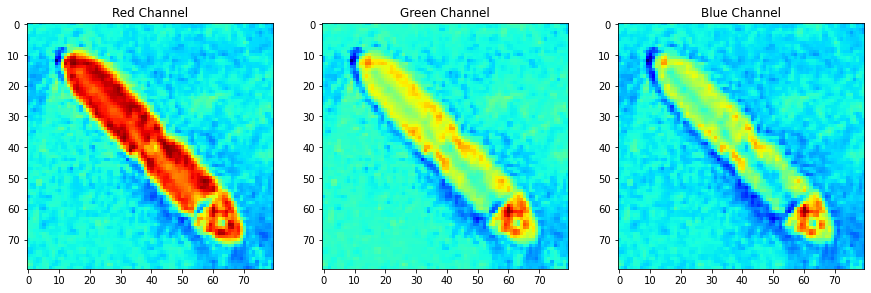

In [68]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# getting each channel
plt.subplot(1, 3, 1)
plt.imshow(Red_Channel)
plt.title("Red Channel")

plt.subplot(1, 3, 2)
plt.imshow(Green_Channel)
plt.title("Green Channel")

plt.subplot(1, 3, 3)
plt.imshow(Blue_Channel)
plt.title("Blue Channel")
    
plt.show()

In [69]:
# We need to change the order of the dimensions to get the correct format to plot the images 

X_reshaped = X.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])

X_reshaped.shape


(4000, 80, 80, 3)

In [70]:
y_reshaped = tf.keras.utils.to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

# Exploring the Images

In [71]:
# Separating X_reshaped to correspond with the different labels

imgs_0 = X_reshaped[y==0]
imgs_1 = X_reshaped[y==1]

In [72]:
# Taking a quick look at a the Not a Ship pictures

def plot(a,b):

    plt.figure(figsize=(15, 15))
    plt.subplot(2,4,1)
    plt.title('Not A Ship')
    plt.imshow(a[0])
    plt.subplot(2,4,2)
    plt.title('Not A Ship')
    plt.imshow(a[1])
    plt.subplot(2,4,3)
    plt.title('Not A Ship')
    plt.imshow(a[2])
    plt.subplot(2,4,4)
    plt.title('Not A Ship')
    plt.imshow(a[3])
    plt.subplot(2,4,5)
    plt.title('Ship')
    plt.imshow(b[0])
    plt.subplot(2,4,6)
    plt.title('Ship')
    plt.imshow(b[1])
    plt.subplot(2,4,7)
    plt.title('Ship')
    plt.imshow(b[2])
    plt.subplot(2,4,8)
    plt.title('Ship')
    plt.imshow(b[3])
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)


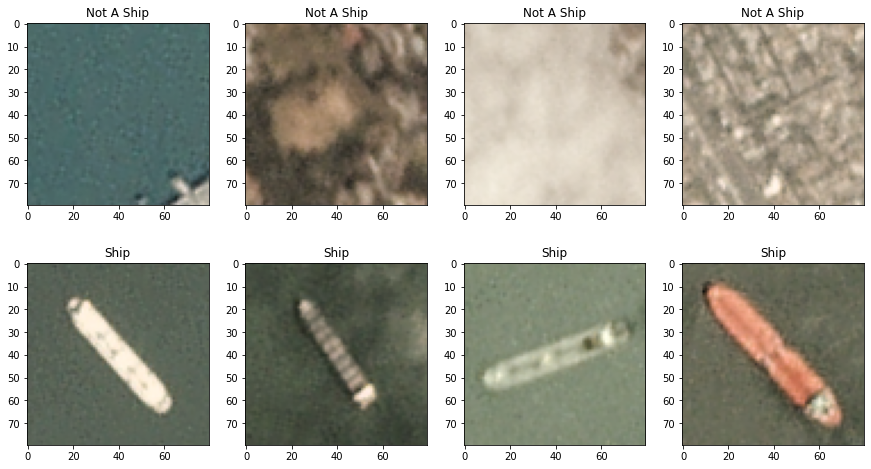

In [73]:
plot(imgs_0, imgs_1)

Creating the Train/Test Split + Validation Set

In [11]:
# Normalizing the X values

X_reshaped = X_reshaped / 255

In [12]:
# Doing the initial train/test split on the reshaped values

X_train_full, X_test, y_train_full, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.20, random_state=42)

# Creating the validation set

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [13]:
np.random.seed(42)

In [14]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())

# fully con
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [15]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])


In [16]:
# training
history = model.fit(
    X_train, 
    y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=2)

Epoch 1/20
75/75 - 18s - loss: 0.4803 - accuracy: 0.7946 - val_loss: 0.3904 - val_accuracy: 0.8775
Epoch 2/20
75/75 - 16s - loss: 0.2755 - accuracy: 0.8808 - val_loss: 0.2283 - val_accuracy: 0.9150
Epoch 3/20
75/75 - 15s - loss: 0.2223 - accuracy: 0.9087 - val_loss: 0.2163 - val_accuracy: 0.9212
Epoch 4/20
75/75 - 15s - loss: 0.2063 - accuracy: 0.9117 - val_loss: 0.1467 - val_accuracy: 0.9525
Epoch 5/20
75/75 - 15s - loss: 0.1541 - accuracy: 0.9367 - val_loss: 0.1413 - val_accuracy: 0.9538
Epoch 6/20
75/75 - 15s - loss: 0.1375 - accuracy: 0.9479 - val_loss: 0.1189 - val_accuracy: 0.9588
Epoch 7/20
75/75 - 15s - loss: 0.1811 - accuracy: 0.9333 - val_loss: 0.1260 - val_accuracy: 0.9563
Epoch 8/20
75/75 - 15s - loss: 0.1259 - accuracy: 0.9558 - val_loss: 0.1239 - val_accuracy: 0.9588
Epoch 9/20
75/75 - 15s - loss: 0.1026 - accuracy: 0.9621 - val_loss: 0.1445 - val_accuracy: 0.9475
Epoch 10/20
75/75 - 15s - loss: 0.0916 - accuracy: 0.9646 - val_loss: 0.1079 - val_accuracy: 0.9613
Epoch 11/

In [17]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 47ms/step - loss: 0.0820 - accuracy: 0.9775


[0.08197522163391113, 0.9775000214576721]

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        9

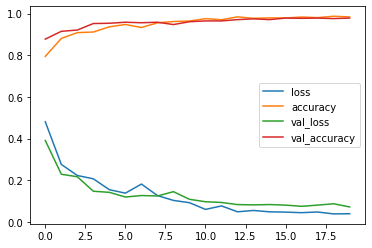

In [18]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();


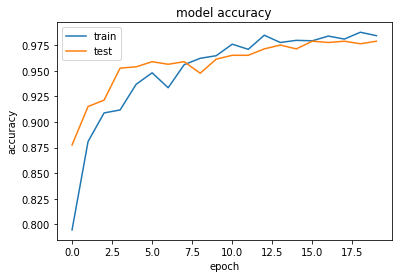

In [19]:
# View model training accuracy graph.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

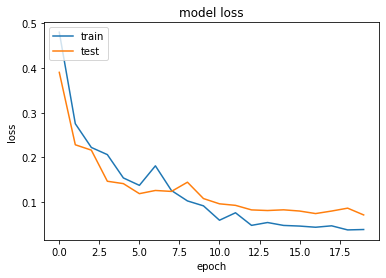

In [20]:
# View model training loss graph.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred = (y_pred > 0.5) 

In [23]:
from sklearn.metrics import classification_report,accuracy_score

# print("Accuracy: "+str(accuracy_score(y_train, y_pred)))
# print('\n')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       591
           1       0.98      0.93      0.96       209

   micro avg       0.98      0.98      0.98       800
   macro avg       0.98      0.96      0.97       800
weighted avg       0.98      0.98      0.98       800
 samples avg       0.98      0.98      0.98       800



[[588   3]
 [ 15 194]]


/home/gb/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
<ipython-input-24-f90cc35696d7>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-24-f90cc35696d7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


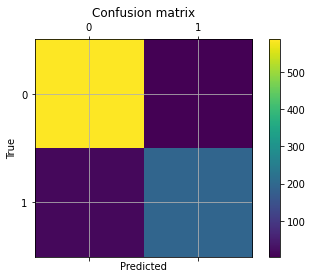

In [24]:
labels = [0,1]
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
np.set_printoptions(precision=2)

plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.grid(None)
plt.show()

In [27]:
image = Image.open('/home/gb/Documents/Subjects/Semester 2/ML Lab/Detecting-Ships-master/sfbay_7.jpg')
pix = image.load()

In [28]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [29]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [30]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

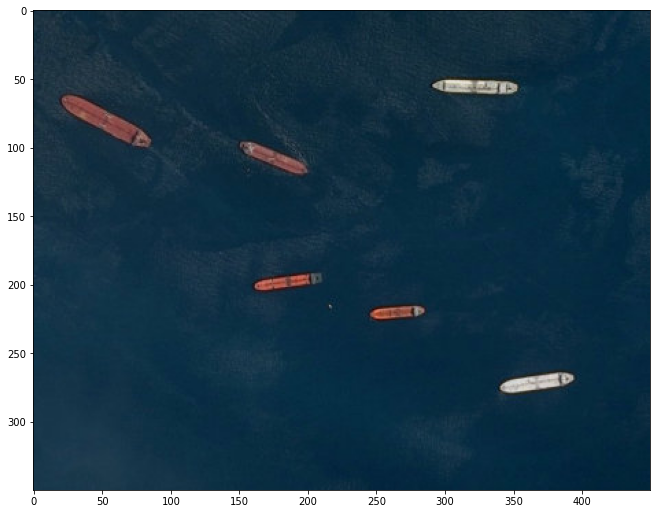

In [31]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [32]:
picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor.shape

(3, 350, 450)

Search on the image

In [33]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [34]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [35]:
def show_ship(x, y, acc, thickness=3):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:270 Y:20  [[0.01 0.99]]
0


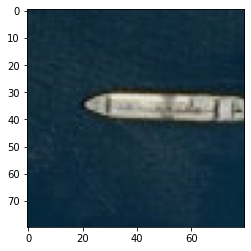

X:10 Y:40  [[0.01 0.99]]
0


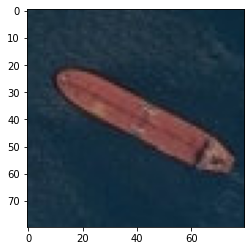

X:140 Y:70  [[0.06 0.94]]
0


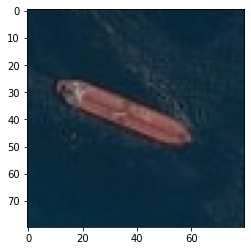

X:130 Y:160  [[7.22e-04 9.99e-01]]
0


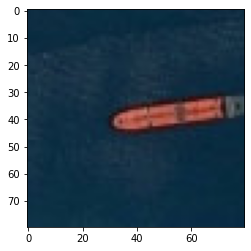

X:220 Y:180  [[0.02 0.98]]
0


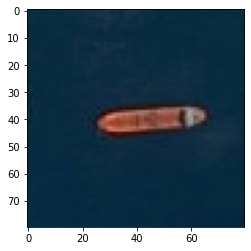

X:320 Y:230  [[0.02 0.98]]
0


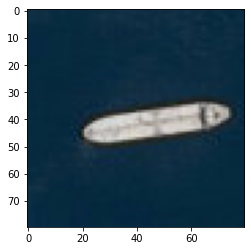

X:370 Y:270  

In [36]:
step = 10
coordinates = []
counter=0
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            print(++counter)
            plt.imshow(area[0])
            plt.show()

In [37]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [38]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(350, 450, 3)

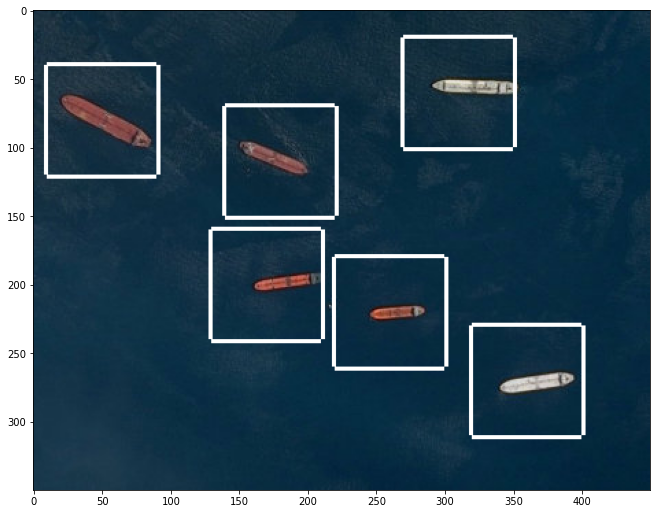

In [39]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)
# plt.imsave("pic.png",picture_tensor)
plt.show()

In [74]:
# Putting all of the predictions in a dataFrame

df = pd.DataFrame(y_pred, columns=class_names)

df = df.round(6)

df


,Not A Ship,Ship
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
795,True,False
796,False,True
797,True,False
798,True,False


In [75]:
# Adding the information from y_test to the predictions dataFrame

df['Test is a Ship'] = y_test[:, 1]

df

,Not A Ship,Ship,Test is a Ship
0,False,True,1.0
1,True,False,0.0
2,False,True,1.0
3,True,False,0.0
4,True,False,0.0
...,...,...,...
795,True,False,0.0
796,False,True,1.0
797,True,False,0.0
798,True,False,0.0


In [76]:
# Finding the images where the model was the most certain that is wasn't a ship when it was

df['Difference'] = df['Ship'] - df['Test is a Ship']

df.sort_values('Difference', ascending=True).head(10)

,Not A Ship,Ship,Test is a Ship,Difference
47,True,False,1.0,-1.0
518,True,False,1.0,-1.0
164,True,False,1.0,-1.0
574,True,False,1.0,-1.0
708,True,False,1.0,-1.0
337,True,False,1.0,-1.0
537,True,False,1.0,-1.0
578,True,False,1.0,-1.0
81,True,False,1.0,-1.0
365,True,False,1.0,-1.0


In [77]:
# Finding the images where the model was the most certain that is was a ship when it wasn't

df.sort_values('Difference', ascending=False).head(10)


,Not A Ship,Ship,Test is a Ship,Difference
747,False,True,0.0,1.0
628,False,True,0.0,1.0
528,False,True,0.0,1.0
0,False,True,1.0,0.0
534,False,True,1.0,0.0
525,True,False,0.0,0.0
526,True,False,0.0,0.0
527,True,False,0.0,0.0
529,False,True,1.0,0.0
530,True,False,0.0,0.0
